x:  tensor([[ 0.7124,  1.2300,  0.0367, -2.5086, -0.1479, -0.5268,  1.7985,  0.8468,
          0.0129,  0.2355, -1.7294, -0.3377, -0.0071,  0.1945,  0.0246,  0.1142],
        [ 0.2066, -0.0890, -2.5455, -0.6610, -0.9960, -1.0575, -0.0183,  2.1358,
          1.3826, -0.3467, -1.0020, -0.6931,  0.0897, -0.7013, -1.7065, -1.1973],
        [-0.3990, -1.8331, -0.9504,  0.9848,  1.4854,  1.2599, -1.4927,  1.0288,
         -0.2466, -1.3625,  0.6270, -1.6589,  1.6829, -0.6485, -0.1123,  0.8440],
        [-0.0028, -0.2792,  0.1382, -0.0136,  0.1387, -0.3283,  0.6269,  0.2017,
          0.2130, -0.1851, -0.9777, -1.3874, -1.8057,  0.4702, -0.4888,  0.2916]])
x1 after linear: tensor([[ 0.7636,  0.4380,  0.6773, -0.1382, -1.4910,  0.6894,  0.4990, -0.0320],
        [-1.0399,  1.0635, -1.0260, -1.0090, -1.9105, -0.7790, -1.1084,  0.0671],
        [-0.0963,  0.3238, -1.0762, -1.1406,  0.1672, -0.7995, -1.0383,  0.2601],
        [ 0.0352, -0.2023,  0.0151,  0.0041, -0.2390, -0.0092,  0.2174,  0.1141]

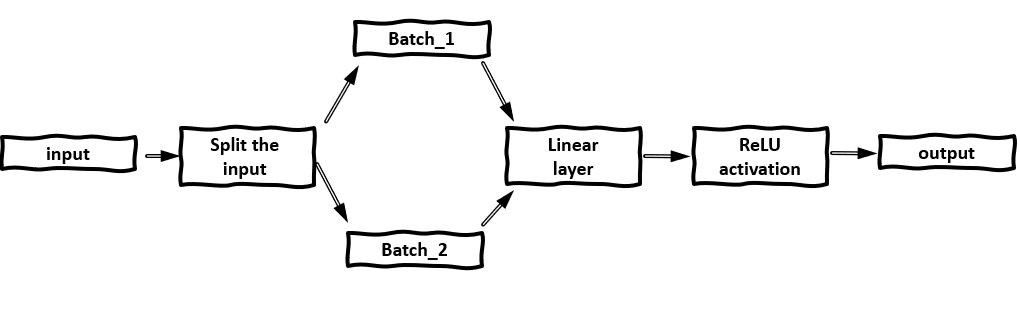

In [156]:
# Q1

import torch
import torch.nn as nn
from IPython.display import Image
#B
class SplitLinear(nn.Module):
    def __init__(self, features_size):
        super(SplitLinear, self).__init__()
        self.features_size = features_size   
        self.half_size = features_size // 2       
        self.linear = nn.Linear(self.half_size, self.half_size)
        self.relu = nn.ReLU() 
        # breaking symmetry while initialize the parameters
        low = -1/math.sqrt(features_size)
        high = 1/math.sqrt(features_size)
        for x in model.parameters():
            value = np.random.normal(loc=1.5, scale=0.25)
            x = np.clip(value, low, high)
#A
    def forward(self, x):
        # get input
        batch_size, features_size = x.size() 
        
        # split
        x1 = torch.narrow(x, dim=1, start=0, length=self.half_size)
        x2 = torch.narrow(x, dim=1, start=self.half_size, length=self.half_size) 
        
        print("x: ", x) 
        fcx1 = self.linear(x1)
        print("x1 after linear:", fcx1)
        fcx2 = self.linear(x2)
        print("x2 after linear:", fcx2)
        out1 = self.relu(fcx1)
        print("x1 after relu: ", out1)
        out2 = self.relu(fcx2) 
        print("x2 after relu: ", out2)
        
        # combine 
        out = torch.cat((out1, out2), dim=1) 
        return out
#C    
# initialize
half_size = 16
batch_size = 4
split_linear = SplitLinear(half_size)
x = torch.randn(batch_size, half_size)

output = split_linear.forward(x)
print(output)

#D
image_path = "C:/Users/haunt/Documents/Screenshot 2023-05-01 194959.jpg"
Image(filename=image_path)




In [ ]:
#E
'''
M is the size of the features. The number of params in the SplitLinear would be:
Num of inputs and outputs: M/2
Synaps/weights: (M/2)**2
Biases: M/2
Summary: (M/2)**2 + M/2 parameters

In a normal linear layer, the calculate would be a bit different:
Synaps/weights: M**2
Biases: M
Summary: M**2 + M parameters

Therefore the SplitLinear layer has much less parameters for a given M.
'''

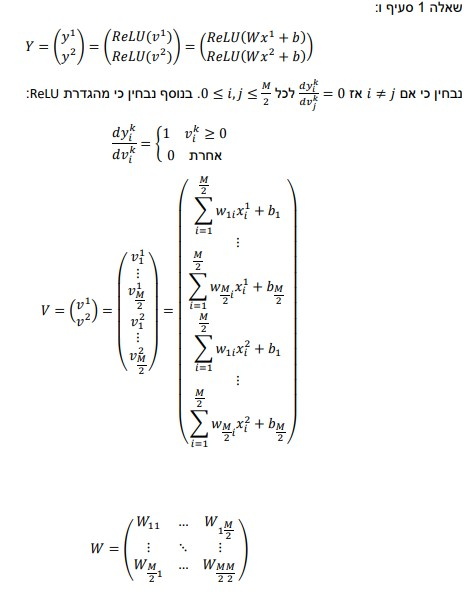

In [23]:
#F+G
image_path = "C:/Users/haunt/Documents/111.jpg"
Image(filename=image_path)

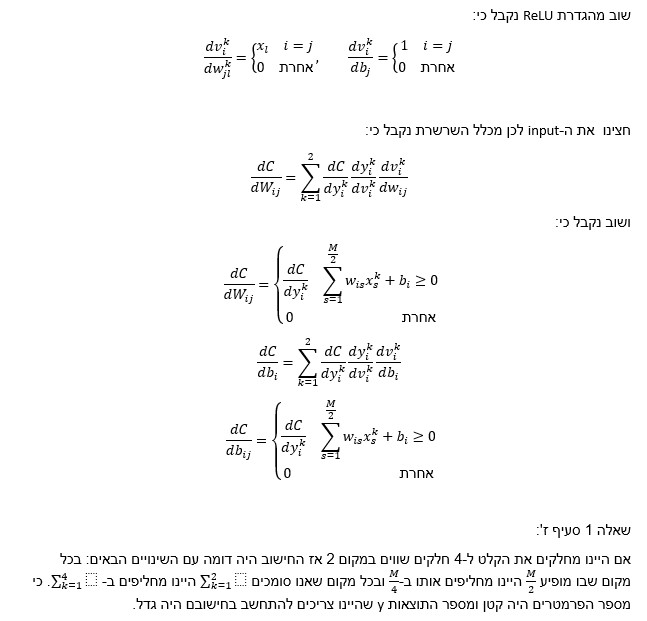

In [24]:
image_path = "C:/Users/haunt/Documents/222.jpg"
Image(filename=image_path)

In [151]:
# Q2
import torch
import torch.nn as nn
import numpy as np
import statistics
import math

def random_zero_half(input_tensor):
    """Set random half of the input tensor to zero."""
    with torch.no_grad():
        mask = torch.rand(input_tensor.shape) > 0.5
        masked_input = input_tensor * mask
        return masked_input

class DropNorm(nn.Module):        
    # C
    def __init__(self, in_features):
        super().__init__()
        self.in_features = in_features 
        self.gamma = nn.Parameter(torch.ones(in_features))
        self.beta = nn.Parameter(torch.zeros(in_features))
        # for running avarege
        self.mu = [] 
        self.sigma2 = []  
        # breaking symmetry while initialize the parameters
        low = -1/math.sqrt(in_features)
        high = 1/math.sqrt(in_features)
        for x in model.parameters():
            value = np.random.normal(loc=1.5, scale=0.25)
            x = np.clip(value, low, high)
            
    # A+B
    def forward(self,x):
        # get input
        x = torch.narrow(x, dim=1, start=0, length=self.in_features)
        if self.training:
            # dropout
            random_zero_half(x)  
            # batch norm
            epsilon = 10**-5
            mu = x.mean(dim=0)
            self.mu.append(mu)
            sigma2 = x.var(dim=0)
            self.sigma2.append(sigma2)
        else:
            # B - for prediction 
            mu = statistics.mean(self.mu)
            sigma2 = statistics.mean(self.sigma2)
        xhat = (x-mu) / torch.sqrt((sigma2)+ epsilon)
        y = self.gamma*xhat + self.beta
        return y

In [149]:
# D
# Define the device (CPU or GPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Define the network architecture
from torch import nn
model = nn.Sequential(
 nn.Linear(784,256), #z
nn.ReLU(),
 nn.Dropout(p=0.2),
 nn.BatchNorm1d(256),
    nn.Linear(256,10),
 nn.LogSoftmax(dim=1) #log(y)
 )

CE_loss = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

def iterate_batch(imgs, labels):
    imgs = imgs.flatten(start_dim=1)
    optimizer.zero_grad()
    y_model = model(imgs)

    loss = CE_loss(y_model,labels)
    loss.backward()
    optimizer.step()

    
    predicted_labels = y_model.argmax(dim=1)
    acc = (predicted_labels == labels).sum()/len(labels)
    return loss.detach(), acc.detach()


# Load the Fashion-MNIST dataset and create data loaders
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

batches = len(trainloader)
loss = torch.zeros(batches)
acc = torch.zeros(batches)
epochs = 11
# train the network
for i in range(epochs):
    for j, (features, labels) in enumerate(trainloader):
        loss[j], acc[j] = iterate_batch(features, labels)       
    if i % 2 == 0:
        print(f" epoch = {i}, loss = {loss.mean()}, acc = {acc.mean()}")

 epoch = 0, loss = 0.5223276019096375, acc = 0.8123167753219604
 epoch = 2, loss = 0.41018927097320557, acc = 0.8514125943183899
 epoch = 4, loss = 0.3908286690711975, acc = 0.8576425909996033
 epoch = 6, loss = 0.36934900283813477, acc = 0.8659715056419373
 epoch = 8, loss = 0.35664355754852295, acc = 0.8703191876411438
 epoch = 10, loss = 0.33632713556289673, acc = 0.8781483173370361


In [152]:
# E
# Define the device (CPU or GPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Define the network architecture
from torch import nn
model = nn.Sequential(
 nn.Linear(784,256), #z
nn.ReLU(),
    DropNorm(256),
    nn.Linear(256,10),
 nn.LogSoftmax(dim=1)
 )



CE_loss = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

def iterate_batch(imgs, labels):
    imgs = imgs.flatten(start_dim=1)
    optimizer.zero_grad()
    y_model = model(imgs)

    loss = CE_loss(y_model,labels)
    loss.backward()
    optimizer.step()

    
    predicted_labels = y_model.argmax(dim=1)
    acc = (predicted_labels == labels).sum()/len(labels)
    return loss.detach(), acc.detach()


# Load the Fashion-MNIST dataset and create data loaders
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

batches = len(trainloader)
loss = torch.zeros(batches)
acc = torch.zeros(batches)
epochs = 11
# train the network
for i in range(epochs):
    for j, (features, labels) in enumerate(trainloader):
        loss[j], acc[j] = iterate_batch(features, labels)       
    if i % 2 == 0:
        print(f" epoch = {i}, loss = {loss.mean()}, acc = {acc.mean()}")


 epoch = 0, loss = 0.4839671552181244, acc = 0.8259261846542358
 epoch = 2, loss = 0.3648606240749359, acc = 0.8672208189964294
 epoch = 4, loss = 0.33164021372795105, acc = 0.8790478706359863
 epoch = 6, loss = 0.30770230293273926, acc = 0.886893630027771
 epoch = 8, loss = 0.2892022728919983, acc = 0.8935734033584595
 epoch = 10, loss = 0.27679240703582764, acc = 0.8988206386566162


In [ ]:
# F
'''
אני מניח שהכוונה הייתה שהקוד המובנה של פייטורצ' יעבוד טוב יותר מהקוד שלי אבל בביצועים שבדקתי התוצאות טובות יותר בשכבה שאני כתבתי.
היתרון של השכבה המובנה הוא במהירות הריצה של התכנית, כצפוי השכבה המובנת מומשה ביתר יעילות מהאופן שבו אני כתבתי את השיטה.
אני מעריך שהסיבה שהשיטה שלי נותנת ביצועים טובים היא שהשתמשתי בפרמטרים לא בדויקים בשיטה המובנית,
או שהתכנית לא רצה מספיק פעמים על הדאטה כדי שפונקציית המחיר תגיע למינימום, ובהרצה ארוכה יותר הקוד המובנה היה נותן ביצועים יותר טובים.
לסיכום במימוש הנוכחי אני אעדיף את השכבה שאני כתבתי בסעיפים א'-ג' של שאלה 2.
'''